# Проверка гипотез и проведение A/B теста для увеличения выручки интернет-магазина

**Описание проекта**  
Отдел маркетинга крупного интернет-магазина подготовил список гипотез для увеличения выручки.  
В файле /datasets/hypothesis.csv содержится 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  
Нужно провести приоритизацию гипотез.  
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.  
Следует проанализировать результаты A/B-теста и сделать выводы.

**Цель исследования:**  
Выяснить, какая из гипотез приведет к наибольшему увеличению выручки.  

**Этапы выполнения проекта:**  
Этап 1. Обзор файлов с данными и изучение информации в таблицах  

Этап 2. Предобработка данных  
- Приведение названий столбцов к строчным буквам.  
- Изменение типов данных при необходимости.   
- Обработка пропусков и дубликатов.  

Этап 3. Приоритизация гипотез  
- Применение фреймворка ICE для приоритизации гипотез.  
- Применение фреймворка RICE для приоритизации гипотез.  
- Анализ изменения результатов приоритизации гипотез при применении RICE вместо ICE.   

Этап 4. Анализ A/B-теста  
- Построение графика кумулятивной выручки по группам.  
- Построение графика кумулятивного среднего чека по группам.  
- Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.  
- Построение графика кумулятивного среднего количества заказов на посетителя по группам.  
- Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.  
- Построение точечного графика количества заказов по пользователям.  
- Расчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.  
- Построение точечного графика стоимостей заказов.  
- Расчет 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.  
- Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.   
- Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.  
- Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.  
- Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.  
- Принятие решения по результатам теста и пояснение относительно его выбора.  

## Открытие файлов и изучение информации в таблицах

In [1]:
# импортируем нужные для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import numpy as np
from scipy import stats as st

In [2]:
# откроем файл с данными о гипотезах и выведем на экран первые 10 строк
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep = ',')
pd.set_option('display.max_colwidth', None)
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Таблица содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  
Описание данных таблицы:  
• Hypothesis — краткое описание гипотезы;  
• Reach — охват пользователей по 10-балльной шкале;  
• Impact — влияние на пользователей по 10-балльной шкале;  
• Confidence — уверенность в гипотезе по 10-балльной шкале;  
• Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  
Таблица содержит 9 строк, пропуски данных в таблице отсутствуют. 
Следует привести названия столбцов к строчным буквам (в разделе "Предобработка данных").

In [4]:
# откроем файл с данными о заказах и выведем на экран первые 5 строк
orders = pd.read_csv('/datasets/orders.csv', sep = ',')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Таблица о заказах содержит 1197 строк, пропуски данных в таблице отсутствуют.  
Описание данных таблицы:  
• transactionId — идентификатор заказа;  
• visitorId — идентификатор пользователя, совершившего заказ;  
• date — дата, когда был совершён заказ;  
• revenue — выручка заказа;  
• group — группа A/B-теста, в которую попал заказ.   
В названиях столбцов присутствуют прописные буквы, следует привести их к строчным буквам.  
Также следует привести тип данных в столбце date к типу даты. Сделаем это в разделе "Предобработка данных".

In [6]:
# откроем файл с данными о количестве пользователей и выведем на экран первые 5 строк
visitors = pd.read_csv('/datasets/visitors.csv', sep = ',')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Таблица о количестве пользователей за каждую дату содержит 62 строки, пропуски данных в таблице отсутствуют.  
Описание данных таблицы:  
• date — дата;  
• group — группа A/B-теста;  
• visitors — количество пользователей в указанную дату в указанной группе A/B-теста.  
Тип данных в столбце date следует привестик типу datetime (в разделе "Предобработка данных").

In [8]:
# найдем минимальную и максимальную даты периода, в течение которого проводился A/B тест
display(visitors['date'].min())
visitors['date'].max()

'2019-08-01'

'2019-08-31'

В таблице содержатся данные за период с 01 по 31 августа 2019 г.

## Предобработка данных

### Приведение названий столбцов к строчным буквам

In [9]:
# приведем названия столбцов в таблице hypothesis к строчным буквам
hypothesis.columns = hypothesis.columns.str.lower()

In [10]:
# заменим названия ряда столбцов в таблице orders
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

### Изменение типа данных

In [11]:
# приведем типы данных в столбце date в таблицах orders и visitors к типу datetime:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Проверка таблиц на дубликаты

In [12]:
tables = [hypothesis, orders, visitors]
for table in tables:
   print(table.duplicated().sum())

0
0
0


Явные дубликаты строк в таблицах отсутствуют.

Вывод: мы привели названия столбцов в таблицах к строчному регистру, заменили названия ряда столбцов.  
Проверили данные на наличие явных дубликатов, дубликаты отсутствуют.    
Проверили столбцы таблиц на наличие пропусков, пропуски отсутствуют.  
В столбцах таблиц, содержащих информацию о дате, привели тип данных к типу datetime.

## Приоритизация гипотез

### Применение фреймворка ICE для приоритизации гипотез

In [13]:
# рассчитаем показатель ICE для каждой из гипотез и отсортируем гипотезы по убыванию приоритета
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


При применении фреймворка ICE наиболее приоритетной гипотезой является гипотеза 9:  Запустить акцию, дающую скидку на товар в день рождения (ICE - 16,2). Следующие по приоритетности гипотезы:  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (ICE - 13,3).
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (ICE - 11,2).
Значения показателя ICE для остальных гипотез составляет менее 10.


### Применение фреймворка RICE для приоритизации гипотез

In [14]:
# рассчитаем показатель RICE для каждой из гипотез и отсортируем гипотезы по убыванию приоритета
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


При применении фреймворка RICE наиболее приоритетной гипотезой является гипотеза 8:  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (RICE - 112,0). Следующие по приоритетности гипотезы:  
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (RICE - 56,0).  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (RICE - 40,0).  
Формула расчета показателя RICE содержит показатель Reach, который определяет, скольких пользователей затронет изменение, которое предполагается внести.  
RICE = ICE * Reach  
Наибольшее значение Reach, равное 10, наблюдается у гипотезы 8, которая становится наиболее приоритетной.

Вывод: наиболее приоритетной гипотезой по результатам применений фреймворка RICE является гипотеза 8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

## Анализ A/B-теста

### Кумулятивные метрики, необходимые для анализа

In [15]:
# рассчитаем кумулятивный показатель количества пользователей до выбранной даты включительно в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
.agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# рассчитаем кумулятивный показатель количества пользователей до выбранной даты включительно в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
.agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# рассчитаем кумулятивный показатель суммарного числа заказов в группе A
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
.groupby('date', as_index=False)
.agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
.agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1)\
.sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# рассчитаем кумулятивный показатель суммарного числа заказов в группе B
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
.groupby('date', as_index=False)
.agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
.agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1)\
.sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# сведем рассчитанные данные в одну таблицу
data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
.merge(ordersACummulative, left_on='date', right_on='date', how='left')
.merge(ordersBCummulative, left_on='date', right_on='date', how='left')
.merge(visitorsADaily, left_on='date', right_on='date', how='left')
.merge(visitorsBDaily, left_on='date', right_on='date', how='left')
.merge(visitorsACummulative, left_on='date', right_on='date', how='left')
.merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


После объединения получили датафрейм со следующими данными:  
date — дата;  
ordersPerDateA — количество заказов в выбранную дату в группе A;  
revenuePerDateA — суммарная выручка в выбранную дату в группе A;  
ordersPerDateB — количество заказов в выбранную дату в группе B;  
revenuePerDateB — суммарная выручка в выбранную дату в группе B;  
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;  
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;  
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;  
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;  
visitorsPerDateA — количество пользователей в выбранную дату в группе A;  
visitorsPerDateB — количество пользователей в выбранную дату в группе B;  
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;  
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

### График кумулятивной выручки по группам

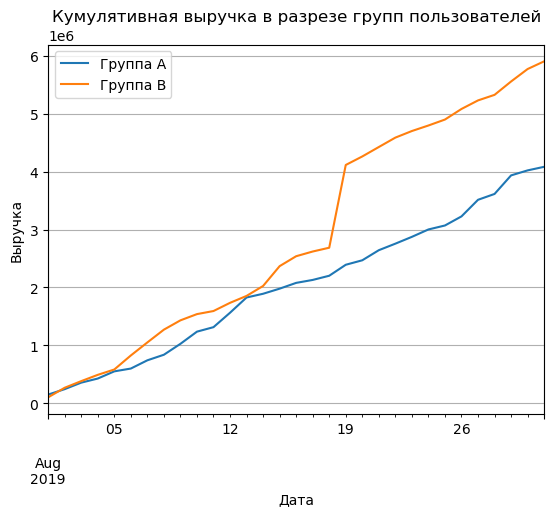

In [16]:
# строим графики кумулятивной выручки по группам A и B
data.plot(x = 'date', y = ['revenueCummulativeA', 'revenueCummulativeB'], grid=True,\
label =['Группа A', 'Группа B'], legend=True)\
.set(title='Кумулятивная выручка в разрезе групп пользователей', xlabel='Дата', ylabel='Выручка')
plt.show()

Вывод: кумулятивная выручка в группе A стабильно превышает показатель в группе B. Выручка в группе A растет практически равномерно в течение всего теста.  
При этом выручка в группе B демонстрирует резкий рост 19.08.2019 г., что может быть связано с резким ростом числа заказов, либо с появлением очень дорогих заказов в группе B.

### График кумулятивного среднего чека заказа по группам

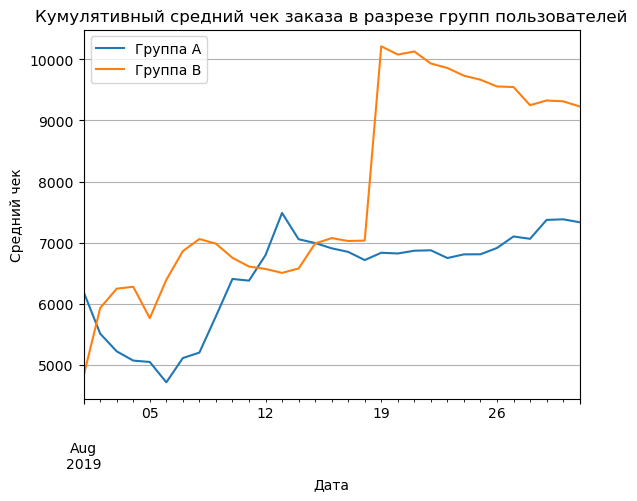

In [17]:
# рассчитаем показатели кумулятивного среднего чека заказа по группам A  и B, построим соответствующие графики
data['cumulative_avg_revenue_A'] = data['revenueCummulativeA'] / data['ordersCummulativeA']
data['cumulative_avg_revenue_B'] = data['revenueCummulativeB'] / data['ordersCummulativeB']
data.plot(x = 'date', y = ['cumulative_avg_revenue_A', 'cumulative_avg_revenue_B'],
grid=True, label =['Группа A', 'Группа B'], legend=True)\
.set(title='Кумулятивный средний чек заказа в разрезе групп пользователей', xlabel='Дата', ylabel='Средний чек')
plt.show()

Вывод: динамика значений кумулятивного среднего чека заказа по группам носит нестабильный характер. Есть периоды как роста, так и падения значений показателя в каждой из групп.  
При этом показатель в группе B превышает показатель в группе A, за исключением периода с 11 по 15 августа 2019 г.  
19.08.2019 г. показатель в группе B резко увеличился c 7000 ед. до более чем 10000 ед., что подтверждает предположение о наличии крупных заказов в группе B.  
В последней декаде августа динамика показателя стабилизируется: средний чек заказа в группе B сокращается, в группе A - незначительно увеличивается.

### График относительного изменения кумулятивного среднего чека заказа группы B к группе A. 

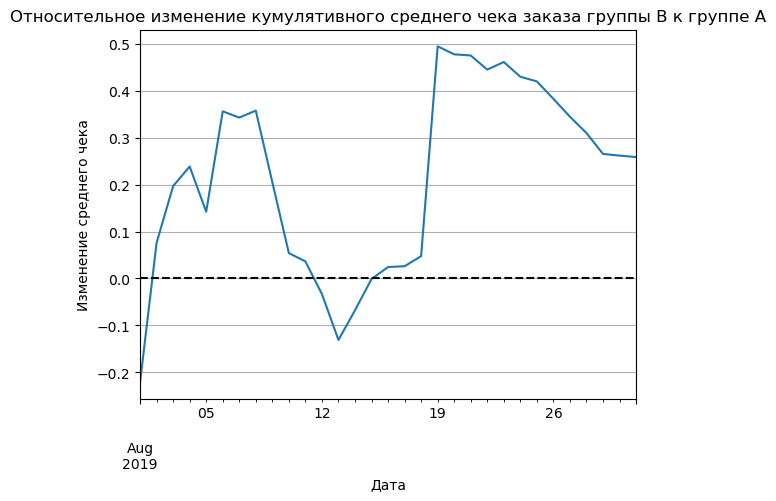

In [18]:
# рассчитаем показатель относительного изменения кумулятивного среднего чека заказа группы B к группе A и построим соответствующий график
data['cumulative_avg_revenue_change'] = data['cumulative_avg_revenue_B'] / data['cumulative_avg_revenue_A']-1
data.plot(x = 'date', y = 'cumulative_avg_revenue_change', grid=True, legend=False)\
.set(title='Относительное изменение кумулятивного среднего чека заказа группы B к группе A',
xlabel='Дата', ylabel='Изменение среднего чека')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Вывод: график относительного изменения кумулятивного среднего чека заказа группы B к группе A свидетельствует о наличии разнонаправленных тенденций показателя в период проведения теста.    
Показатели группы B нестабильны и демонстрируют как рост, так и снижение: наблюдается относительный рост суммы кумулятивного чека заказа группы В по сравнению с группой А примерно до 08.08.2019 г. (до 0,35), далее резкий спад до 13.08.2019 г. включительно (ниже -0,1), резкий подъем до 19.08.2019 г. включительно (до 0,5) и вновь относительное падение, но не ниже нулевого уровня.  
В целом кумулятивная выручка группы В выше по сравнению с группой А, но она нестабильна. Возможно, данное обстоятельство обусловлено наличием выбросов в одной или двух группах.

### График кумулятивного среднего количества заказов на посетителя по группам

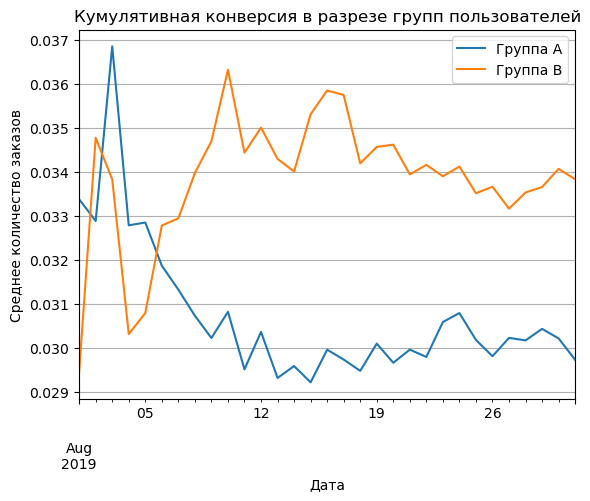

In [19]:
# рассчитаем показатели кумулятивного среднего количества заказов на посетителя по группам и построим соответствующие графики
data['cumulative_avg_orders_A'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']
data['cumulative_avg_orders_B'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']
data.plot(x = 'date', y = ['cumulative_avg_orders_A', 'cumulative_avg_orders_B'],
grid=True, label =['Группа A', 'Группа B'], legend=True)\
.set(title='Кумулятивная конверсия в разрезе групп пользователей',
xlabel='Дата', ylabel='Среднее количество заказов')
plt.show()

Вывод: начиная с 06.08.2019 г. значения показателя кумулятивного среднего количества заказов на посетителя по группе B стабильно превышают значения показателем по группе А.  
При этом примерно с 17.08.2019 г. показатель по группе B демонстрирует небольшое снижение - с 0,036 до 0,034 на конец месяца.  
Показатель по группе A c 08.08.2019 г. колеблется в диапазоне 0,029 - 0,031.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

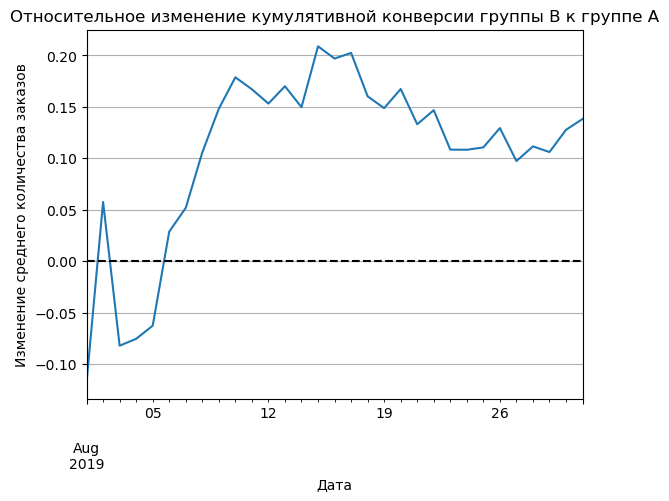

In [20]:
# роассчитаем показатель относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A и построим соответствующий график
data['cumulative_avg_orders_change'] = data['cumulative_avg_orders_B'] / data['cumulative_avg_orders_A']-1
data.plot(x = 'date', y = 'cumulative_avg_orders_change', grid=True, legend=False)\
.set(title='Относительное изменение кумулятивной конверсии группы B к группе A',
xlabel='Дата', ylabel='Изменение среднего количества заказов')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Вывод: значения показателя относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A начиная с 06.08.2019 г. стабильно превышают нулевое значение.    
Наибольших значений (0,2) показатель достигает в середине августа 2019 г., после чего наблюдается тенденция к его снижению до 0,13 к концу месяца.

### Точечный график количества заказов по пользователям

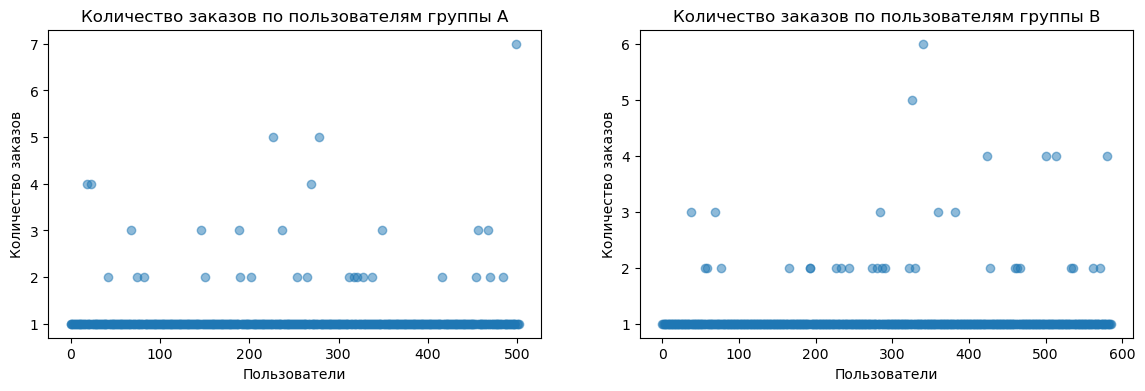

In [21]:
# Cоздадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'transactions_count'].
# В них для пользователей, которые заказывали хотя бы один раз, укажем число совершённых заказов. 
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False)\
.agg({'transaction_id': pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'transactions_count']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False)\
.agg({'transaction_id': pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'transactions_count']

# построим точечные графики количества заказов по пользователям групп A и B.
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
x_values = pd.Series(range(0, len(ordersByUsersA['visitor_id'])))
plt.scatter(x_values, ordersByUsersA['transactions_count'], alpha = 0.5)
plt.title('Количество заказов по пользователям группы A')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

plt.subplot(1, 2, 2)
x_values = pd.Series(range(0, len(ordersByUsersB['visitor_id'])))
plt.scatter(x_values, ordersByUsersB['transactions_count'], alpha = 0.5)
plt.title('Количество заказов по пользователям группы B')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')               
plt.show()

Пользователи групп A и B преимущественно делали заказы один раз, реже два раза. Количество пользователей, оформивших заказ от 3 до 7 раз, невелико.

### Расчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [22]:
# произведем расчет 95-го и 99-го перцентилей количества заказов на пользователя в группе A.  
print(np.percentile(ordersByUsersA['transactions_count'], [95, 99])) 

[2.   3.98]


Для группы A 95-й и 99-й перцентили количества заказов на одного пользователя составляют 2 и 3,98 соответственно.  
Таким образом, в группе A количество пользователей, оформивших более двух заказов, составляет не более 5%, более трех заказов - не более 1%. 

In [23]:
# произведем расчет 95-го и 99-го перцентилей количества заказов на пользователя в группе B.
print(np.percentile(ordersByUsersB['transactions_count'], [95, 99]))

[2.   3.15]


Для группы B 95-й и 99-й перцентили количества заказов на одного пользователя составляют 2 и 3,15 соответственно.  
Таким образом, в группе B количество пользователей, оформивших более двух заказов, составляет не более 5%, более трех заказов - не более 1%.   
В качестве аномальных пользователей в обеих группах примем тех пользователей, кто оформил три заказа и более.  
Это позволит исключить из анализа до 3% пользователей с наибольшим количеством заказов.

### Точечный график стоимостей заказов

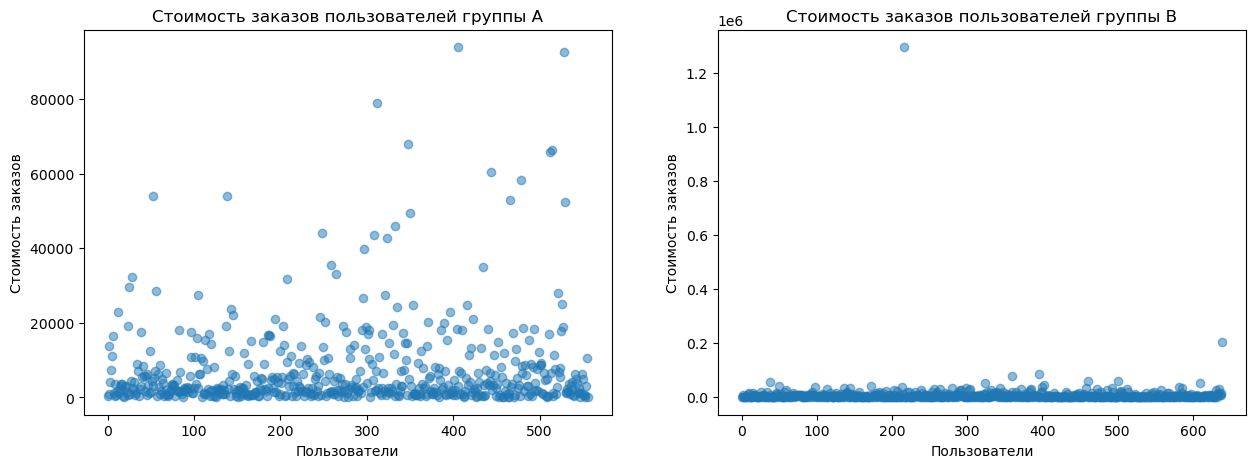

In [24]:
# выберем стоимость заказов в группах A и B
revenue_A = orders.query('group == "A"')['revenue']
revenue_B = orders.query('group == "B"')['revenue']

# построим точечные графики стоимости заказов, оформленных пользователями групп A и B.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
x_values = pd.Series(range(0, len(revenue_A)))
plt.scatter(x_values, revenue_A, alpha = 0.5)
plt.title('Стоимость заказов пользователей группы A')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

plt.subplot(1, 2, 2)
x_values = pd.Series(range(0, len(revenue_B)))
plt.scatter(x_values, revenue_B, alpha = 0.5)
plt.title('Стоимость заказов пользователей группы B')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

В группе B присутствует один заказ с аномально большой суммой, превышающей 1,2 млн.  
Уменьшим масштаб графика для группы B до 100 тыс.ед.

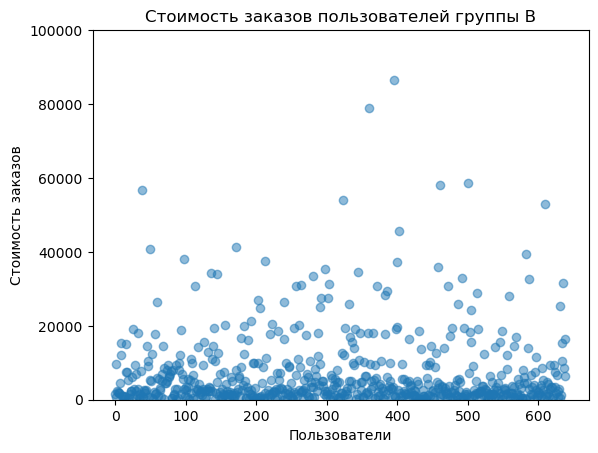

In [25]:
x_values = pd.Series(range(0, len(revenue_B)))
plt.scatter(x_values, revenue_B, alpha = 0.5)
plt.title('Стоимость заказов пользователей группы B')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.ylim(0, 100000)

plt.show()

Как видно из графика, основная часть пользователей в группах A и B оформляла заказы стоимостью до 10 тыс.ед.

In [26]:
orders.sort_values(by='revenue', ascending=False).head(5)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


Все заказы, за исключением двух, находятся в диапазоне до 100 тыс.ед. Аномально большой заказ в группе B повлиял на резкий рост кумулятивного показателя среднего чека в данной группе.  
На графике был заметен резкий рост показателя 19.08.2019 г.

### Расчет 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.

In [27]:
# произведем расчет 95-го и 99-го перцентилей стоимости заказов в группе A.  
print(np.percentile(revenue_A, [95, 99])) 

[26718.  62764.4]


Для группы A 95-й и 99-й перцентили стоимости заказов пользователей составляют 26718 ед. и 62764,4 ед. соответственно.  
Таким образом, в группе A не более 5% пользователей оформили заказы на сумму более 26718 ед., не более 1% - на сумму более 62764 ед.

In [28]:
# произведем расчет 95-го и 99-го перцентилей количества заказов на пользователя в группе B.
print(np.percentile(revenue_B, [95, 99]))

[28787.45 55579.06]


Для группы B 95-й и 99-й перцентили стоимости заказов пользователей составляют 28787,45 ед. и 55579,06 ед. соответственно.  
Таким образом, в группе B не более 5% пользователей оформили заказы на сумму более 28787 ед., не более 1% - на сумму более 55579 ед.  
В качестве аномальных заказов в обеих группах примем заказы, превышающие сумму 30000 ед.  
Это позволит исключить из анализа до 5% пользователей с наибольшей стоимостью заказа.

### Расчет статистической значимости различий в среднем количестве заказов на пользователя между группами по «сырым» данным. 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.  
Тем, кто ничего не заказал, будут соответствовать нули.
Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.  
Переменная sampleA должна состоять из двух частей:  
- Список с количеством заказов для каждого из пользователей: ordersByUsersA['transactions_count'].
- Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах:  
data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions_count']).  
Создадим объект pd.Series нужной длины:

In [29]:
sampleA = pd.concat([ordersByUsersA['transactions_count'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() -
len(ordersByUsersA['transactions_count'])), name='transactions_count')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactions_count'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() -
len(ordersByUsersB['transactions_count'])), name='transactions_count')],axis=0) 

Посчитаем статистическую значимость различия в среднем количестве заказов на пользователя между группами с использованием метода Манна-Уитни.  
Проверяемые гипотезы:  
Нулевая гипотеза (Н0): статистически значимых различий в среднем количестве заказов на посетителя между группами нет.   
Альтернативная гипотеза (Н1): статистически значимые различия в среднем количестве заказов на посетителя между группами имеются.  
Уровень статистической значимости примем равным 0,05

In [30]:
# рассчитаем p-value по методу Манна-Уитни
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
# рассчитаем относительное изменение среднего числа заказов на пользователя группы B по сравнению с группой A
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Вывод: значение p-value по "сырым" данным составило 0,017, что меньше уровня статистической значимости.  
Нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, отвергаем.  
Относительная разница среднего числа заказов на пользователя группы B по сравнению с группой A составила 0,138 или 13,8%.  
Таким образом, группа B продемонстрировала результат лучше по сравнению с группой A.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке заказа между группами A и B.  
Проверяемые гипотезы:  
Нулевая гипотеза (Н0): статистически значимых различий в среднем чеке между группами нет  
Альтернативная гипотеза (Н1): статистически значимые различия в среднем чеке между группами имеются  
Чтобы рассчитать статистическую значимость различий в среднем чеке заказа, передадим критерию mannwhitneyu() данные о выручке с заказов. 
Также найдем относительные различия в среднем чеке между группами.
Уровень статистической значимости примем равным 0,05

In [31]:
# рассчитаем p-value по методу Манна-Уитни
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# рассчитаем относительное изменение среднего чека заказа группы B по сравнению с группой A
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


Вывод: значение p-value по "сырым" данным составило 0,729, что существенно выше уровня статистической значимости.  
Нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем.  
Соответственно нет оснований считать, что имеются различия в среднем чеке заказа между группами.  
При этом, относительная разница среднего чека заказа группы B по сравнению с группой A составила 0,259 или 25,9%, т.е. группа B продемонстрировала результат существенно лучше по сравнению с группой A.  
Основной причиной такого расхождения в результатах могут являться выбросы в группе B, связанные с аномально высокими суммами отдельных заказов.

### Расчет статистической значимости различий в среднем количестве заказов на пользователя между группами по «очищенным» данным

Ранее мы определили границы для определения аномальных пользователей и аномальных заказов.  
В качестве аномальных пользователей в обеих группах примем тех пользователей, кто оформил три заказа и более.  
В качестве аномальных заказов в обеих группах примем заказы, превышающие сумму 30000 ед.   
Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы более 30000 ед. — usersWithExpensiveOrders.  
Объединим их в таблице abnormalUsers. 
Рассчитаем количество аномальных пользователей атрибутом shape.

In [32]:
# расчет количества аномальных пользователей в группах A и B
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactions_count'] > 2]['visitor_id'],\
ordersByUsersB[ordersByUsersB['transactions_count'] > 2]['visitor_id']], axis=0)
                                 
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)\
.drop_duplicates().sort_values()
                                 
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
68


Всего выявлено 68 аномальных пользователей. 
Проанализируем, как их действия повлияли на результаты теста.  
Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.  
Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['visitor_id'],
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions_count'])), name='transactions_count')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['visitor_id'],
pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions_count'])), name='transactions_count')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам с данными, "очищенными" от выбросов.  
Проверяемые гипотезы:  
Нулевая гипотеза (Н0): статистически значимых различий в среднем количестве заказов на посетителя между группами нет.  
Альтернативная гипотеза (Н1): статистически значимые различия в среднем количестве заказов на посетителя между группами имеются.  
Уровень статистической значимости примем равным 0,05.

In [34]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean()-1)) 

0.014
0.138


Вывод: результаты по среднему количеству заказов после исключения аномальных значений практически не изменились.  
Значение p-value по "очищенным" данным составило 0,014 (по "сырым" данным - 0,017), что меньше уровня статистической значимости.  
Нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, отвергаем.  
Относительная разница среднего числа заказов на пользователя группы B по сравнению с группой A составила 0,138 или 13,8% (по "сырым" данным также получилось 0,138), т.е. группа B продемонстрировала результат лучше по сравнению с группой A.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами теста по очищенным данным.  
Применим статистический критерий Манна-Уитни к полученным выборкам с данными, "очищенными" от выбросов.  
Проверяемые гипотезы:  
Нулевая гипотеза (Н0): статистически значимых различий в среднем чеке между группами нет  
Альтернативная гипотеза (Н1): статистически значимые различия в среднем чеке между группами имеются  
Уровень статистической значимости примем равным 0,05

In [35]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id']
.isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()
/ orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id']
.isin(abnormalUsers)))]['revenue'].mean() - 1))

0.720
-0.023


Вывод: значение p-value по "очищенным" данным составило 0,720 (по "сырым" данным - 0,729), что существенно выше уровня статистической значимости.  
Нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем.  
Соответственно нет оснований считать, что имеются различия в среднем чеке заказа между группами.  
Относительная разница среднего чека заказа группы B по сравнению с показателем группы A составила -0,023 или -2,3% (по "сырым" данным - 0,259 или 25,9%)
Таким образом, после исключения аномальных значений группа B продемонстрировала результат хуже на 2,3% по сравнению с группой A.

### Решение по результатам теста

**Выводы:**  
Мы провели приоритизацию 9-ти представленных гипотез по увеличению выручки интернет-магазина методами ICE и RICE.  
При применении фреймворка ICE наиболее приоритетной гипотезой является гипотеза 9:  Запустить акцию, дающую скидку на товар в день рождения (ICE - 16,2).  
При применении фреймворка RICE наиболее приоритетной гипотезой является гипотеза 8:  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (RICE - 112,0) из-за наибольшего значения показателя Reach, который определяет, скольких пользователей затронет изменение, которое предполагается внести. У данной гипотезы Reach равен 10.

В августе 2019 года был проведен A/B тест, по результатам которого выявлены следующие закономерности и особенности:
- Кумулятивная выручка в группе A стабильно превышает показатель в группе B на протяжении всего теста. Выручка в группе A растет практически равномерно в течение всего теста.  
При этом выручка в группе B демонстирирует резкий рост 19.08.2019 г.
- Динамика значений кумулятивного среднего чека заказа по группам носит нестабильный характер. Есть периоды как роста, так и падения значений показателя в каждой из групп.  
При этом показатель в группе B превышает показатель в группе A, за исключением периода с 11 по 15 августа 2019 г.  
19.08.2019 г. показатель в группе B резко увеличился c 7000 ед. до более чем 10000 ед., что подтверждает предположение о наличии крупных заказов в группе B.  
В последней декаде августа динамика показателя стабилизируется: средний чек заказа в группе B сокращается, в группе A - незначительно увеличивается.
- Показатель относительного изменения кумулятивного среднего чека заказа группы B к группе A демонстрирует как рост, так и снижение: наблюдается рост суммы кумулятивного чека заказа группы В по сравнению с группой А примерно до 08.08.2019 г. (до 0,35), далее резкий спад до 13.08.2019 г. включительно (ниже -0,1), резкий подъем до 19.08.2019 г. включительно (до 0,5) и вновь относительное падение, но не ниже нулевого уровня.
В целом кумулятивная выручка группы В выше по сравнению с группой А, но она нестабильна.
- Значения показателя кумулятивного среднего количества заказов на посетителя по группе B стабильно превышают значения показателем по группе А начиная с 06.08.2019 г.  
При этом примерно с 17.08.2019 г. показатель по группе B демонстрирует небольшое снижение - с 0,036 до 0,034 на конец месяца. Показатель по группе A c 08.08.2019 г. колеблется в диапазоне 0,029 - 0,031.
- Значения показателя относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A начиная с 06.08.2019 г. стабильно превышают нулевое значение.    
Наибольших значений (0,2) показатель достигает в середине августа 2019 г., после чего наблюдается тенденция к его снижению до 0,13 к концу месяца.
- Пользователи групп A и B преимущественно делали заказы один раз, реже два раза. Количество пользователей, оформивших заказ от 3 до 7 раз, невелико. В обоих группах количество пользователей, оформивших более двух заказов, составляет не более 5%, более трех заказов - не более 1%.
- Основная часть пользователей в группах A и B оформляла заказы стоимостью до 10 тыс.ед.  
Все заказы, за исключением двух, находятся в диапазоне до 100 тыс.ед. Аномально большой заказ в группе B в сумме 1294500 ед. повлиял на резкий рост кумулятивного показателя среднего чека в данной группе, зафиксированный 19.08.2019 г.  
В группе A не более 5% пользователей оформили заказы на сумму более 26718 ед., не более 1% - на сумму более 62764 ед. В группе B не более 5% пользователей оформили заказы на сумму более 28787 ед., не более 1% - на сумму более 55579 ед. 


Был произведен расчет статистической значимости различий в среднем количестве заказов на пользователя между группами и в среднем чеке заказа между группами по «сырым» и «очищенным» данным.  
Для очистки от выбросов, в качестве аномальных пользователей в обеих группах приняли тех пользователей, кто оформил три заказа и более. В качестве аномальных заказов в обеих группах приняли заказы, превышающие сумму 30000 ед.
По результатам анализа можно сделать следующие выводы:  
- При расчете статистической значимости различия в среднем количестве заказов на пользователя между группами с использованием метода Манна-Уитни по «сырым» данным, показатель p-value составил 0,017, что меньше уровня статистической значимости (0,05). Гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, отвергаем.  
Относительная разница среднего числа заказов на пользователя группы B по сравнению с группой A составила 0,138 или 13,8%. Таким образом, группа B продемонстрировала результат лучше по сравнению с группой A.
- После исключения аномальных значений результаты по среднему количеству заказов практически не изменились. Значение p-value по «очищенным» данным составило 0,014 (по "сырым" данным - 0,017), нулевую гипотезу отвергаем. Относительная разница среднего числа заказов на пользователя группы B по сравнению с группой A не изменилась (0,138 или 13,8%).

- При расчете статистической значимости различий в среднем чеке заказа между группами с использованием метода Манна-Уитни по «сырым» данным, значение p-value составило 0,729, что существенно выше уровня статистической значимости.  
Нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем. Поэтому нет оснований считать, что имеются различия в среднем чеке заказа между группами.  
При этом, относительная разница среднего чека заказа группы B по сравнению с группой A составила 0,259 или 25,9%, т.е. группа B продемонстрировала результат существенно лучше по сравнению с группой A.  
- Значение p-value по "очищенным" данным составило 0,720 (по "сырым" данным - 0,729), изменилось несущественно, нулевую гипотезу не отвергаем.  
Относительная разница среднего чека заказа группы B по сравнению с показателем группы A по очищенным данным составила отрицательную величину: -0,023 или -2,3% (по "сырым" данным - положительная величина 0,259 или 25,9%).  
Таким образом, после исключения аномальных значений группа B продемонстрировала результат хуже на 2,3% по сравнению с группой A. Можно сказать, что каких-либо отличий в сумме среднего чека заказа между группами после очистки данных не наблюдается.

**Рекомендации:**  
Тест остановить, зафиксировать отсутствие различий между группами A и B по сумме среднего чека и победу группы В по среднему количеству заказов в расчете на одного пользователя.

